In [12]:

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [13]:
x,y,hue,key_id = ['locationAccordingTo']*4

In [14]:
#with open(os.path.join('data','dataset_metadata.csv'), 'r') as f:
with open('/home/elubrini/Downloads/dataset_metadata.csv', 'r') as f:
    df = pd.read_csv(f)
    exercise = df

numeric_columns = ['dateIdentified']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()

,catalogNumber,sourceCategory,dateIdentified,database,language,observ,PDF,Corpus_PDF_references,References Endnote,associatedReferences,locationAccordingTo
0,NS1517,Literature,1763.0,Psyl'list,English,freely available online,PDF,1763_Scopoli_1763_Chermes = Cacopsylla_pruni e...,Scopoli JA (1763),https://www.hemiptera-databases.org/psyllespdf...,Scopoli JA (1763) Entomologia Carniolica exhib...
1,NS0890,Literature,1805.0,BHL,German,freely available online,PDF,1805_Bechstein_extrait,Bechstein (1805),https://doi.org/10.5962/bhl.title.16563,Bechstein JM & Scharfenberg GL (1805) Vollstan...
2,NS1122,Literature,1837.0,BHL,English,freely available online,PDF,1837_Curtis_Cacopsylla_pruni_Britain_page_220,Curtis J (1837),https://doi.org/10.5962/bhl.title.46860,Curtis J (1837) A guide to an arrangement of B...
3,NS0891,Literature,1848.0,Psyl'list,German,freely available online,PDF,1848_Foerster_psyllids1,Foerster (1848),https://www.hemiptera-databases.org/psyllespdf...,Foerster A (1848) Uebersicht der gattungen und...
4,NS0892,Literature,1848.0,Psyl'list,German,freely available online,PDF,1848_Foerster_psyllids1,Foerster (1848),https://www.hemiptera-databases.org/psyllespdf...,Foerster A (1848) Uebersicht der gattungen und...


In [17]:
def plot(data,
        x=None,
        y=None,
        hue=None,

        key_id=None,
        drop_doubles = True,

        slice_top = False,
        split=False,
        yscale=None,

        title='',
        margin_titles = True,
        xlabel='',
        ylabel='',
        huelabel='',
        palette='pastel',
        
        type='dist',

        hist=True,
        kde=True,
        bins=25,
        element='bars',
        ):

    ## df
    subset = list(filter(None,[x,y,hue,key_id]))
    data = data.dropna(subset=subset)

    if drop_doubles:
        data = data.drop_duplicates(subset=subset)


    if slice_top:
        for k,v in slice_top.items():
            top = pd.value_counts(data[k]).iloc[0:v].index
            data = data[data[k].isin(top)]

    if split:
        for k,v in split.items():
            other_slice = pd.value_counts(data[k]).iloc[v-1:].index
            data.loc[data[k].isin(other_slice), k] = 'other'
    
    if not key_id:
        key_id = key_id=data.columns[0]
    
    ## fig
    if type == 'violin':
        split = len(set(data[hue]))==2
        sns.violinplot(data=data,
                    x=x,
                    y=y,
                    hue=hue,
                    legend=True,
                    split=split,
                    palette=palette,
                    cut=0,
                    )
    elif type == 'dist':
        sns.displot(data=data,
                    x=x,
                    y=y,
                    hue=hue,      
                    kind='kde',
                    legend=True,
                    palette=palette,
                    cut=0,
                    )
    elif type == 'hist':
        sns.histplot(data=data,
                    x=x,
                    y=y,
                    hue=hue,
                    bins=bins,      
                    legend=True,
                    palette=palette,
                    )
    elif type == 'cat':
        sns.catplot(data=data,
                    x=x,
                    y=y,
                    palette=palette,
                    )
                    
    if yscale:
        plt.yscale(yscale)

    if not ylabel:
        ylabel = y
    if not xlabel:
        xlabel = x
    if not huelabel:
        huelabel = hue
        
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    if not title:
        if hue and x and not y:
            title = 'Distribution of ' + str(huelabel)+ (' per ' + str(xlabel))*bool(xlabel)
        else:
            title = str(xlabel)+ (' vs ' + str(ylabel))*bool(ylabel) + (' grouped by ' + str(huelabel))*bool(huelabel)
    plt.title(title)
    #plt.legend(title=huelabel)
    plt.show()
    

In [18]:
x = 'dateIdentified'
y = 'observ'
hue = 'language'

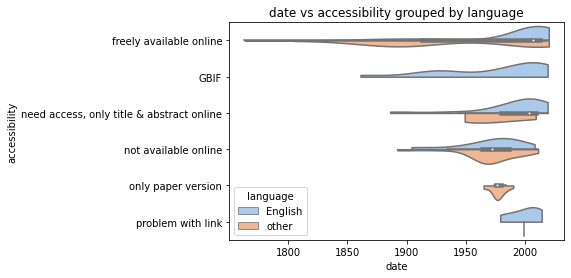

In [19]:
plot(x=x, y=y, hue=hue, data=df, key_id=key_id,
    type='violin',
    split={hue:2},
    xlabel='date', ylabel='accessibility', huelabel='language',
    )

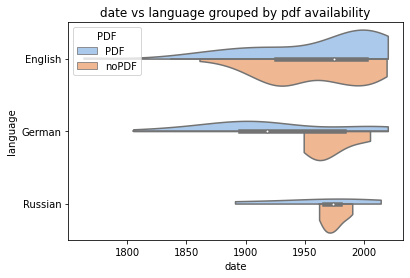

In [20]:
x = 'dateIdentified'
hue = 'PDF'
y = 'language'

plot(x=x, y=y, hue=hue, data=df,
    type='violin',
    slice_top={y:3},
    xlabel='date', ylabel='language', huelabel='pdf availability',
    )

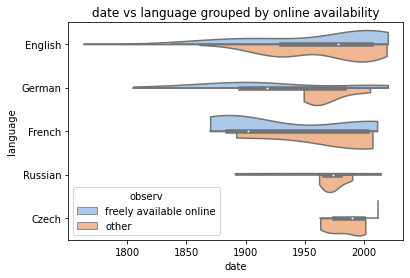

In [21]:
x = 'dateIdentified'
hue = 'observ'
y = 'language'

plot(x=x, y=y, hue=hue, data=df,
    type='violin',
    split={hue:2}, slice_top={y:5},
    xlabel='date', ylabel='language', huelabel='online availability',
    )

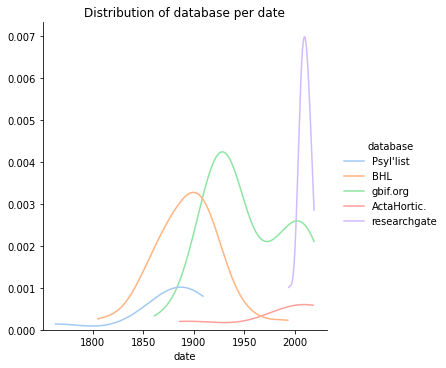

In [22]:
x = 'dateIdentified'
hue = 'database'

plot(x=x, hue=hue, data=df,
    type='dist',
    slice_top={hue:5},
    xlabel='date', ylabel='', huelabel='database',
    )

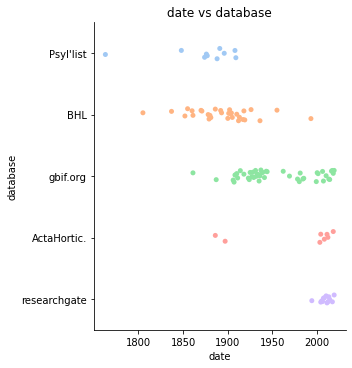

In [23]:
x = 'dateIdentified'
y = 'database'
hue = 'language'

plot(x=x, y=y, data=df,
    type='cat',
    slice_top={y:5},
    xlabel='date', ylabel='database', huelabel='',
    )